In [1]:
import tensorflow as tf
import numpy as np
import gzip
import idx2numpy
import matplotlib.pyplot as plt

# MNIST

In [2]:
train_images_file = 'mnist/train-images.idx3-ubyte'
train_labels_file = 'mnist/train-labels.idx1-ubyte'
train_images_data = idx2numpy.convert_from_file(train_images_file)
train_labels_data = idx2numpy.convert_from_file(train_labels_file)

test_images_file = 'mnist/t10k-images.idx3-ubyte'
test_labels_file = 'mnist/t10k-labels.idx1-ubyte'
test_images_data = idx2numpy.convert_from_file(test_images_file)
test_labels_data = idx2numpy.convert_from_file(test_labels_file)

In [3]:
training_images = np.array(train_images_data)
training_labels = np.array(train_labels_data)

test_images = np.array(test_images_data)
test_labels = np.array(test_labels_data)

In [4]:
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
training_images = training_images / 255
test_images = test_images / 255

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
    tf.keras.layers.AvgPool2D(2, 2),
    tf.keras.layers.Conv2D(16, (5, 5), activation='tanh'),
    tf.keras.layers.AvgPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2173 - accuracy: 0.9358
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0806 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0566 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9855
Test loss: 0.04445367306470871, Test accuracy: 98.54999780654907


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 507)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5080      
Total params: 5,110
Trainable params: 5,110
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4557 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2669 - accuracy: 0.9220
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2264 - accuracy: 0.9338 0s - loss: 0.2260 - accura
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1990 - accuracy: 0.9419
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9515
Test loss: 0.16874584555625916, Test accuracy: 95.14999985694885


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))

Epoch 1/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1294 - accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0314 - accuracy: 0.9900
Test loss: 0.03135362267494202, Test accuracy: 99.00000095367432


In [15]:
predicted = model.predict(test_images)
pred = []
for i in range(len(predicted)):
    x = np.argmax(predicted[i])
    pred.append(x)
print(tf.math.confusion_matrix(np.array(pred), test_labels))

tf.Tensor(
[[ 977    0    3    0    0    1    6    0    4    1]
 [   1 1131    1    0    0    0    3    2    0    0]
 [   0    2 1024    2    0    1    0    4    3    0]
 [   0    1    0  993    0    2    0    0    0    0]
 [   0    0    1    0  970    0    2    1    0    2]
 [   0    1    0    8    0  886    2    1    0    5]
 [   1    0    0    0    3    2  945    0    1    0]
 [   1    0    2    3    0    0    0 1013    2    1]
 [   0    0    1    3    0    0    0    1  962    1]
 [   0    0    0    1    9    0    0    6    2  999]], shape=(10, 10), dtype=int32)


In [16]:
miss_array = [[[0, -1.0] for _ in range(10)] for _ in range(10)]

In [17]:
for i in range(len(predicted)):
    actual_class = test_labels[i]
    for j in range(10):
        v = predicted[i][j]
        if v > miss_array[actual_class][j][1]:
            miss_array[actual_class][j][0] = i
            miss_array[actual_class][j][1] = v

In [18]:
# print(test_labels[2707])
# print(predicted[2707])
print(miss_array)


[[[13, 1.0], [9634, 0.978285], [4065, 0.14526421], [6597, 0.009865293], [490, 0.0026222316], [5450, 0.097661614], [6651, 0.5389006], [6597, 0.78527814], [2185, 0.25154006], [6597, 0.17407985]], [[7928, 0.0015309257], [14, 1.0], [3073, 0.62301594], [3906, 0.5853321], [4759, 0.010131118], [1527, 0.65444714], [3601, 0.27744436], [3073, 0.051260114], [619, 0.031538073], [6572, 0.0032903268]], [[2462, 0.9599484], [4248, 0.5353792], [35, 1.0], [2959, 0.04352793], [646, 0.57657975], [7249, 0.0011295147], [646, 0.25361612], [4176, 0.90787375], [5634, 0.93667287], [4248, 0.021086542]], [[4256, 0.31919283], [4443, 0.44485274], [2927, 0.96004593], [309, 1.0], [2280, 0.00042152798], [4740, 0.9958009], [2280, 0.063850924], [1681, 0.96112317], [5955, 0.9194391], [8246, 0.50747687]], [[2938, 0.018895265], [4265, 0.037733633], [2836, 0.16350086], [5676, 0.0016033486], [27, 1.0], [8527, 0.018238682], [1112, 0.98910403], [5676, 0.03625464], [7434, 0.06411795], [2130, 0.9989416]], [[9770, 0.62419945], [2

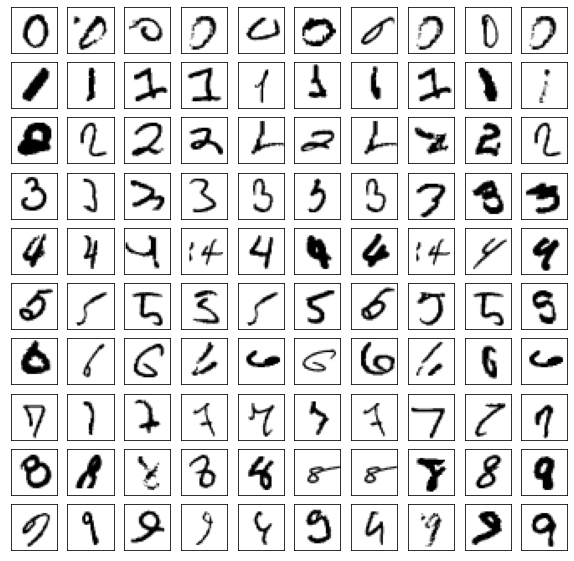

In [19]:
training_images = training_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))
plt.figure(figsize=(10,10))
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, (i * 10) + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        id = miss_array[i][j][0]
        plt.imshow(test_images[miss_array[i][j][0]], cmap=plt.cm.binary)
plt.show()

# Fashion MNIST

In [20]:
train_images_file = 'fashion-mnist/train-images-idx3-ubyte'
train_labels_file = 'fashion-mnist/train-labels-idx1-ubyte'
train_images_data = idx2numpy.convert_from_file(train_images_file)
train_labels_data = idx2numpy.convert_from_file(train_labels_file)

test_images_file = 'fashion-mnist/t10k-images-idx3-ubyte'
test_labels_file = 'fashion-mnist/t10k-labels-idx1-ubyte'
test_images_data = idx2numpy.convert_from_file(test_images_file)
test_labels_data = idx2numpy.convert_from_file(test_labels_file)

In [21]:
training_images = np.array(train_images_data)
training_labels = np.array(train_labels_data)

test_images = np.array(test_images_data)
test_labels = np.array(test_labels_data)

In [22]:
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [23]:
training_images = training_images / 255
test_images = test_images / 255

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4540 - accuracy: 0.8366
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3012 - accuracy: 0.8894
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2559 - accuracy: 0.9064
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2202 - accuracy: 0.9189
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2551 - accuracy: 0.9060
Test loss: 0.2550594210624695, Test accuracy: 90.6000018119812


In [26]:
predicted = model.predict(test_images)
pred = []
for i in range(len(predicted)):
    x = np.argmax(predicted[i])
    pred.append(x)
print(tf.math.confusion_matrix(np.array(pred), test_labels))

tf.Tensor(
[[867   2  12  12   1   0 119   0   6   0]
 [  0 972   0   2   0   0   0   0   0   0]
 [ 24   2 897  12  91   0  92   0   6   0]
 [ 20  16  10 947  32   0  32   0   5   0]
 [  2   5  37  14 785   0  40   0   3   0]
 [  1   0   0   0   0 988   1  15   3   7]
 [ 81   2  43  13  90   0 713   0   3   0]
 [  0   0   0   0   0  10   0 958   3  31]
 [  5   1   1   0   1   1   3   0 971   0]
 [  0   0   0   0   0   1   0  27   0 962]], shape=(10, 10), dtype=int32)


In [27]:
miss_array = [[[0, -1.0] for _ in range(10)] for _ in range(10)]

In [28]:
for i in range(len(predicted)):
    actual_class = test_labels[i]
    for j in range(10):
        v = predicted[i][j]
        if v > miss_array[actual_class][j][1]:
            miss_array[actual_class][j][0] = i
            miss_array[actual_class][j][1] = v

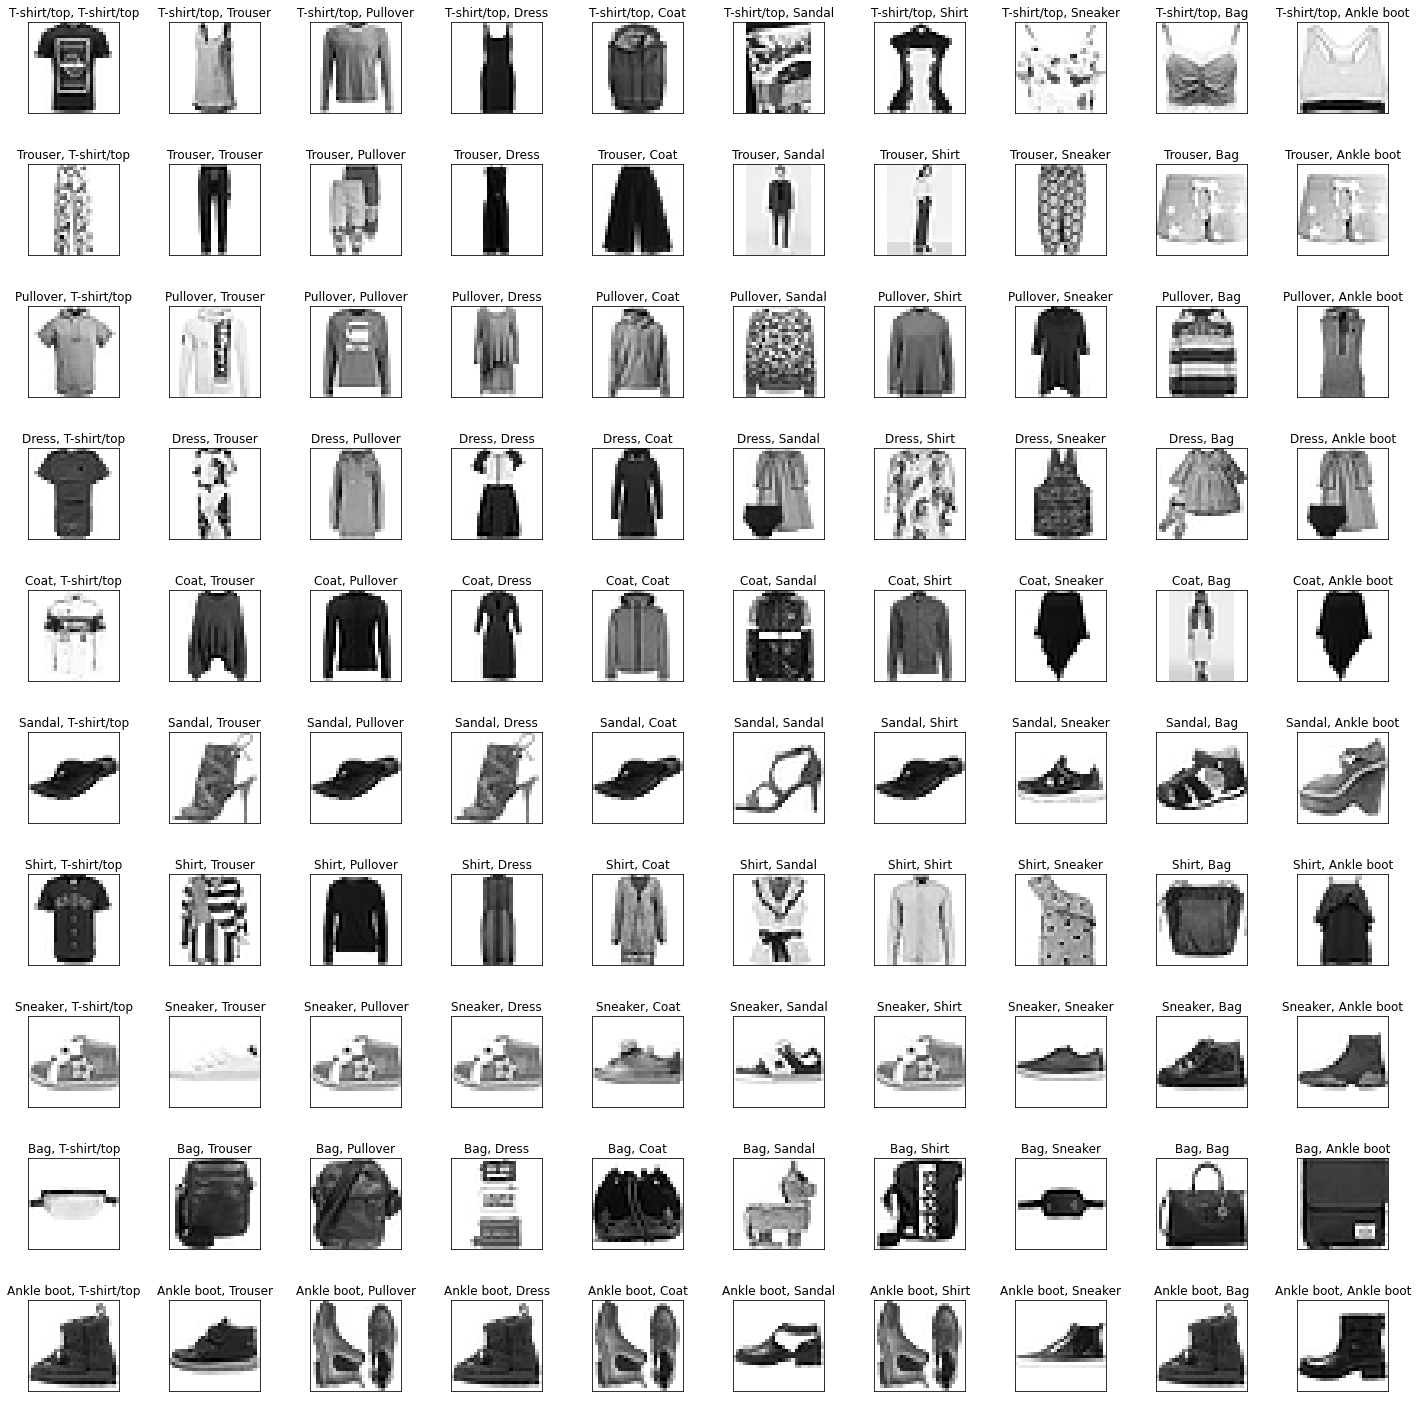

In [29]:
names = dict()
names[0] = "T-shirt/top"
names[1] = "Trouser"
names[2] = "Pullover"
names[3] = "Dress"
names[4] = "Coat"
names[5] = "Sandal"
names[6] = "Shirt"
names[7] = "Sneaker"
names[8] = "Bag"
names[9] = "Ankle boot"

training_images = training_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))
plt.figure(figsize=(20,20))
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, (i * 10) + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        id = miss_array[i][j][0]
        plt.imshow(test_images[id], cmap=plt.cm.binary)
        plt.title(names[test_labels[id]] +", "+ names[j])
plt.tight_layout(pad=2)
plt.show()